In the example document below we show how to load and visualise the Google Trends and WHO Flunet datasets.

Changes to the demonstration in the lecture:

 - each search term result was downloaded seperately from the google trends website
 - period was May 2010 to May 2015 (Google only returns monthly summaries if you try to search for more than 5 years).
 - the full UK Flunet WHO data was downloaded (covers 1995 to present) and we use PANDAs to select the 5 years matching the Google Trends data.
 - the `read_csv` function call has been adapted to have argument `skiprows` that can skip the first lines in the datafile that are not part of the data table
 - we use the pandas `replace` function to change instances of `<1` to `0`
 - to make a fit that produces a formula to predict cases based on search terms we use the `ols` function from the `statsmethod` module.

#### Preparing the workspace and downloading the data

The following search term data was downloaded:

 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu
 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu_jab
 - https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu_symptoms

(As Google scales the results to range 0-100 this means we keep more accuracy when looking for terms that have a relatively low search volume).

Create a working directory `week_7` and store our notebook in this. Add a new subdirectory `data` where we save the output files. These are renames to:

 - `"google_trends_flu.csv"`
 - `"google_trends_flu_jab.csv"`
 - `"google_trends_flu_symptoms.csv"`

To download the WHO Flunet data go to: https://www.who.int/tools/flunet

Then click on link: <a href="http://apps.who.int/flumart/Default.aspx?ReportNo=7">By country, area or territory - optional time period selection</a>

Select `United Kingdom of Great Britain and Northern Ireland` from 1995 week 1 to 2021 week 53, and click `Display report`. 

When the chart appears click the *Save to disk* icon and select *CVS (comma delimited)*. 

Rename the downloaded file and save it into the `data` subdirectory.

`who_flunet.csv`



In [520]:
# import libraries used by the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

In [521]:
data_path

'data/who_flunet_uk.csv'

We can either organise our data by putting it in our working directory, or if we have a lot of files we can put them in their own directory on our disk.


In [522]:
# generate a string containing the filepath to the file
data_path = os.path.join("data", "google_trends_flu.csv")
# 'data/google_trends_original.csv'

# load in the file.
# skiprows=3 is used to skip the lines that do not contain the data
# names=... is used to rename the columns
flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','search_vol'])
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        261 non-null    object
 1   search_vol  261 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [523]:
# convert the date column from object type (storing strings) to datetime type
flu_df.date = pd.to_datetime(flu_df.date)
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        261 non-null    datetime64[ns]
 1   search_vol  261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [524]:
# sometimes google trends enters writes `<1` to indicate 
# search volume was not zero but was less than 1

# in this case we can replace this with 0 (otherwise we can't convert to a number) 
flu_df['search_vol'] = flu_df['search_vol'].replace('<1','0')

# with this fixed we convert the search volume data to a 'float64'
# meaning the standard Python float type
flu_df['search_vol'] = flu_df['search_vol'].astype('float64')

flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        261 non-null    datetime64[ns]
 1   search_vol  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [525]:
flu_df.head()

,date,search_vol
0,2010-05-02,6.0
1,2010-05-09,6.0
2,2010-05-16,7.0
3,2010-05-23,6.0
4,2010-05-30,5.0


In [526]:
# to compare across data sets we will rescale to normalise
# the data by dividing by the maximum value so all values are between 0 and 1

flu_df['search_vol'] = flu_df['search_vol']/flu_df['search_vol'].max()

flu_df.head()

,date,search_vol
0,2010-05-02,0.06
1,2010-05-09,0.06
2,2010-05-16,0.07
3,2010-05-23,0.06
4,2010-05-30,0.05


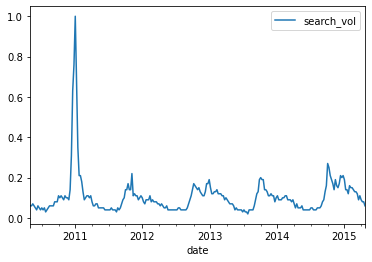

In [527]:
ax = flu_df.plot(x='date', y='search_vol')

In [528]:
# load in google trends data for searches for `flu`
data_path = os.path.join("data", "google_trends_flu.csv")

gtrends_df = pd.read_csv(data_path, 
                     skiprows = 3, 
                     names = ['date', 'search_vol'])

gtrends_df.date = pd.to_datetime(gtrends_df.date)

gtrends_df['search_vol'] = gtrends_df['search_vol'].replace('<1','0')

gtrends_df['search_vol'] = gtrends_df['search_vol'].astype('float64')

gtrends_df['search_vol'] = gtrends_df['search_vol'] / gtrends_df['search_vol'].max()

# we will repeat the code above to load in other files
# to avoid overwriting our dataframe we rename it as gtrends_flu_df 
gtrends_flu_df = gtrends_df

In [529]:
# load in google trends data for searches for `flu jab`
data_path = os.path.join("data", "google_trends_flu_jab.csv")

gtrends_df = pd.read_csv(data_path, 
                     skiprows = 3, 
                     names = ['date', 'search_vol'])

gtrends_df.date = pd.to_datetime(gtrends_df.date)

gtrends_df['search_vol'] = gtrends_df['search_vol'].replace('<1','0')

gtrends_df['search_vol'] = gtrends_df['search_vol'].astype('float64')

gtrends_df['search_vol'] = gtrends_df['search_vol'] / gtrends_df['search_vol'].max()

# rename as gtrends_flu_jab_df 
gtrends_flu_jab_df = gtrends_df

In [530]:
# load in google trends data for searches for `flu symptoms`
data_path = os.path.join("data", "google_trends_flu_symptoms.csv")

gtrends_df = pd.read_csv(data_path, 
                     skiprows = 3, 
                     names = ['date', 'search_vol'])

gtrends_df.date = pd.to_datetime(gtrends_df.date)

gtrends_df['search_vol'] = gtrends_df['search_vol'].replace('<1','0')

gtrends_df['search_vol'] = gtrends_df['search_vol'].astype('float64')

gtrends_df['search_vol'] = gtrends_df['search_vol'] / gtrends_df['search_vol'].max()

# rename as gtrends_flu_symptoms_df 
gtrends_flu_symptoms_df = gtrends_df

In [531]:
# make a combined dataframe storing the results of each search term
# by taking the columns out of the three dataframes we have loaded

data_cols = [ gtrends_flu_df['date'], 
             gtrends_flu_df['search_vol'], 
             gtrends_flu_jab_df['search_vol'],
             gtrends_flu_symptoms_df['search_vol'] ]

# we use .concat to concatenate or join the columns together
# using axis=1 means stack columns together,
# (alternatively we can use axis=0 to stack rows together)

flu_df = pd.concat(data_cols,axis=1)

# rename the columns by search term

flu_df.columns = ['date', 'flu', 'flu_jab', 'flu_symptoms']

# use the date column as the index labels

flu_df = flu_df.set_index('date') 
flu_df

,flu,flu_jab,flu_symptoms
date,,,
2010-05-02,0.06,0.00,0.02
2010-05-09,0.06,0.01,0.04
2010-05-16,0.07,0.00,0.05
2010-05-23,0.06,0.01,0.06
2010-05-30,0.05,0.00,0.01
...,...,...,...
2015-03-29,0.11,0.01,0.08
2015-04-05,0.09,0.00,0.09
2015-04-12,0.08,0.01,0.06


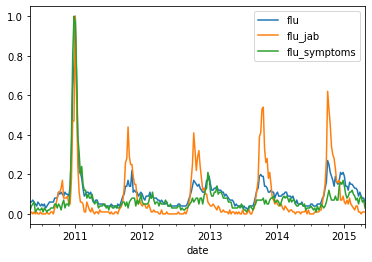

In [532]:
# by default the .plot uses the index labels for the x-data
# and plots each column as a y-data series

ax = flu_df.plot()

Now we can load in the WHO Flunet data. 

If we look in the downloaded file, we can see that the files produced by the WHO website has some issues:

 - it does not use sensible column heading names
 - column headings are not in a sensible order (year and week might be placed first)
 - it contains unnecessary columns storing the strain names (these could be indicated by column heading).

If you dig into the data we see:
    
 - col 1 stores label `AH5`
 - col 2 stores year
 - col 3 stores week
 - col 4 stores counts of `AH5`
 
Then the data falls into a pattern storing a column containing a strain label, followed by a column of counts.

The code below loads the data, skipping the non-data lines, and specifying simpler and more accurate column names. 

It then adds a date column from the year and week information (there is a PANDAs function for this).

Finally we select only the useful columns (date and strain counts) to produce a final better organised WHO dataset.

In [558]:
data_path = os.path.join("data", "who_flunet_uk.csv")

colnames = [ 'a_h5_label', 'year', 'week', 'a_h5',
             'a_h1_label', 'a_h1',
             'a_h1n1_label', 'a_h1n1',
             'a_h3_label', 'a_h3',
             'a_notsubtyped_label', 'a_notsubtyped',
             'b_yamagata_label', 'b_yamagata',
             'b_victoria_label', 'b_victoria',
             'b_notdetermined_label', 'b_notdetermined' ]

who_df = pd.read_csv(data_path, skiprows=4, names= colnames) 

In [559]:
date_vals = []

for i in range(len(who_df)):
    year = who_df.year[i]
    week_num = who_df.week[i]
    entry_date = pd.Timestamp.fromisocalendar(year,week_num,1)
    date_vals.append(entry_date)

who_df['date'] = date_vals

In [560]:
col_selection = [ 'date', 'a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped',
                  'b_yamagata','b_victoria','b_notdetermined' ]

who_df = who_df[col_selection]

<AxesSubplot:xlabel='date'>

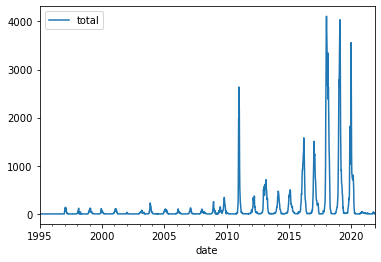

In [561]:
# to look at summary of the counts we create new columns
# that sum the a_strain counts and b_strain counts and
# then finds the total counts

a_cols = ['a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped']
b_cols = ['b_yamagata','b_victoria','b_notdetermined']

who_df['total_a'] = who_df[a_cols].sum(axis=1)
who_df['total_b'] = who_df[b_cols].sum(axis=1)
who_df['total'] = who_df['total_a'] + who_df['total_b']

who_df.plot(x='date', y='total')

In [562]:
# we now need to select a range from the who data that matches the google trends data
# we see flu_df has 261 rows running from 2010-05-02 to 2014-04-26
flu_df

,flu,flu_jab,flu_symptoms
date,,,
2010-05-02,0.06,0.00,0.02
2010-05-09,0.06,0.01,0.04
2010-05-16,0.07,0.00,0.05
2010-05-23,0.06,0.01,0.06
2010-05-30,0.05,0.00,0.01
...,...,...,...
2015-03-29,0.11,0.01,0.08
2015-04-05,0.09,0.00,0.09
2015-04-12,0.08,0.01,0.06


In [563]:
# extract the start and end dates
start_date = flu_df.index[0]
end_date = flu_df.index[-1]

print(start_date, end_date)

2010-05-02 00:00:00 2015-04-26 00:00:00


In [564]:
# select the who_df rows in this range
row_selection = (who_df['date'] >= start_date) & (who_df['date'] <= end_date)

# update who_df to keep only this selection
who_df = who_df[row_selection]
who_df

,date,a_h5,a_h1,a_h1n1,a_h3,a_notsubtyped,b_yamagata,b_victoria,b_notdetermined,total_a,total_b,total
800,2010-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,2010-05-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
802,2010-05-17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
803,2010-05-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,2010-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2015-03-23,NaN,0.0,6.0,36.0,10.0,17.0,0.0,85.0,52.0,102.0,154.0
1056,2015-03-30,NaN,0.0,9.0,15.0,14.0,23.0,3.0,90.0,38.0,116.0,154.0
1057,2015-04-06,NaN,0.0,3.0,10.0,11.0,11.0,2.0,101.0,24.0,114.0,138.0
1058,2015-04-13,NaN,0.0,4.0,5.0,7.0,30.0,0.0,107.0,16.0,137.0,153.0


In [565]:
# recall flu_df has 261 rows running from 2010-05-02 to 2014-04-26
# who_df has 260 rows running from 2010-05-03 to 2014-04-20

# there is a slight mismatch in the start date used for the week
# we could try to see if we can adjust this (e.g. start the google trends a day earlier)
# but for now we will adjust the date column of who_df by 1 day

who_df['date_adj'] = who_df['date'] + pd.Timedelta(1, unit='D')

/var/folders/f7/m7mf1v_90_q2vbjdrf__lv7w0000gn/T/ipykernel_68487/1999324313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  who_df['date_adj'] = who_df['date'] + pd.Timedelta(1, unit='D')


In [566]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_flu.csv")
#print(data_path)

flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu'])

flu_df.date = pd.to_datetime(flu_df.date)

data_cols = flu_df.columns[flu_df.columns != 'date']

flu_df[data_cols] = flu_df[data_cols].replace('<1','0').astype('float64')

for col in data_cols:
    flu_df[col] = flu_df[col]/flu_df[col].max()
    
flu_df

,date,flu
0,2010-05-02,0.06
1,2010-05-09,0.06
2,2010-05-16,0.07
3,2010-05-23,0.06
4,2010-05-30,0.05
...,...,...
256,2015-03-29,0.11
257,2015-04-05,0.09
258,2015-04-12,0.08
259,2015-04-19,0.08


In [ ]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_flu_jab.csv")
#print(data_path)

flu_jab_df = None
flu_jab_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu_jab'])

flu_jab_df.date = pd.to_datetime(flu_jab_df.date)

data_cols = flu_jab_df.columns[flu_jab_df.columns != 'date']

flu_jab_df[data_cols] = flu_jab_df[data_cols].replace('<1','0').astype('float64')

for col in data_cols:
    flu_jab_df[col] = flu_jab_df[col]/flu_jab_df[col].max()
    
flu_df['flu_jab'] = flu_jab_df['flu_jab']
flu_df

In [ ]:
ax = who_df.plot(x='date', y='total')
flu_df.plot(x='date', y=['flu','flu_jab'], ax=ax)

In [ ]:
start_date = flu_df.iloc[0].date
end_date = flu_df.iloc[-1].date

date_index = pd.date_range(start=start_date, end=end_date, freq='w')
flu_df.index = date_index


row_selection = (who_df['date'] >= start_date) & (who_df['date'] <= end_date)
who_df = who_df[row_selection]

who_df.index = date_index[:-1]

In [ ]:
combined_df = pd.concat([flu_df.iloc[:-1], who_df['total']], axis=1 )
data_cols = combined_df.columns[combined_df.columns != 'date']
ax = combined_df[data_cols].plot()

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='total ~ flu + flu_jab ', data=combined_df).fit()
lm.summary()

In [ ]:
f"predicted_total = {lm.params['flu']:.3f}*flu + {lm.params['flu_jab']:.3f}*flu_jab"



In [ ]:
combined_df['predicted'] = lm.fittedvalues

ax = combined_df.plot(x='date', y=['total','predicted'])